In [1]:
# PREDIKCIA HODNOT FYZIKALNYCH PARAMETROV NA DORYKOVYCH OBSERVACNYCH SYSTEMOCH METODOU k-NN

In [2]:
# BLOK 1
# Importovanie kniznic.

import numpy as np
import pandas as pd
import math
import pickle

import matplotlib.pyplot as plt
from keras.models import load_model
from ast import literal_eval

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

2023-05-09 14:55:16.696914: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# BLOK 2
# Nacitanie observacnych dat

data_obs = pd.read_csv("observed.csv")

In [4]:
# BLOK 3
# Nacitanie modelu
# Model natrenovany na krivkach s pridanym sumom - knn_overcontact_noise_model.pkl

model = pickle.load(open("models/knn_overcontact_model.pkl", 'rb'))

In [5]:
# BLOK 4
# Nacitanie a spracovanie observacnych dat

data_obs["Inc"]=(data_obs["Inc"]*math.pi)/180.0
data_obs["T2/T1"]=data_obs["T2"]/data_obs["T1"]
data_obs=data_obs[["Name", "Filter", "Spot", "T2/T1", "Inc", "Q", "Omega1", "Omega2", "Curve", "Type"]]
data_obs=data_obs.loc[data_obs.Type.isin(["overcontact"])]
# data_obs=data_obs.loc[data_obs.Spot.isin(["N"])]

X=[]
for row in data_obs["Curve"]:
    processed_data=literal_eval(row)
    X.append(processed_data)
X=np.array(X, dtype=np.float32)

In [6]:
#BLOK 5
# Predikcia a ulozenie predikovanych hodnot do tabulky

y_pred = model.predict(X)

denorm_df = pd.DataFrame(y_pred, columns = [
                        "pred_t2/t1",
                        "pred_inc",
                        "pred_q",
                        "pred_omega1",
                        "pred_omega2"
                        ])
data_obs["pred_inc"] = denorm_df["pred_inc"].values
data_obs["pred_q"] = denorm_df["pred_q"].values
data_obs["pred_omega1"] = denorm_df["pred_omega1"].values
data_obs["pred_omega2"] = denorm_df["pred_omega2"].values
data_obs["pred_t2_t1"] = denorm_df["pred_t2/t1"].values

In [7]:
# funkcia na vykreslenie SPOTU v grafe

def autolabel(rects, pos):
    n=0
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2. +0.23 , pos,
                s=spot.Spot[n],
                ha='center', va='bottom', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))
        n=n+1
        
spot=data_obs[["Name", "Spot"]].drop_duplicates().reset_index()
spot.Spot=spot.Spot.map({"N":"", "Y":"SPOT", "y":"SPOT"})

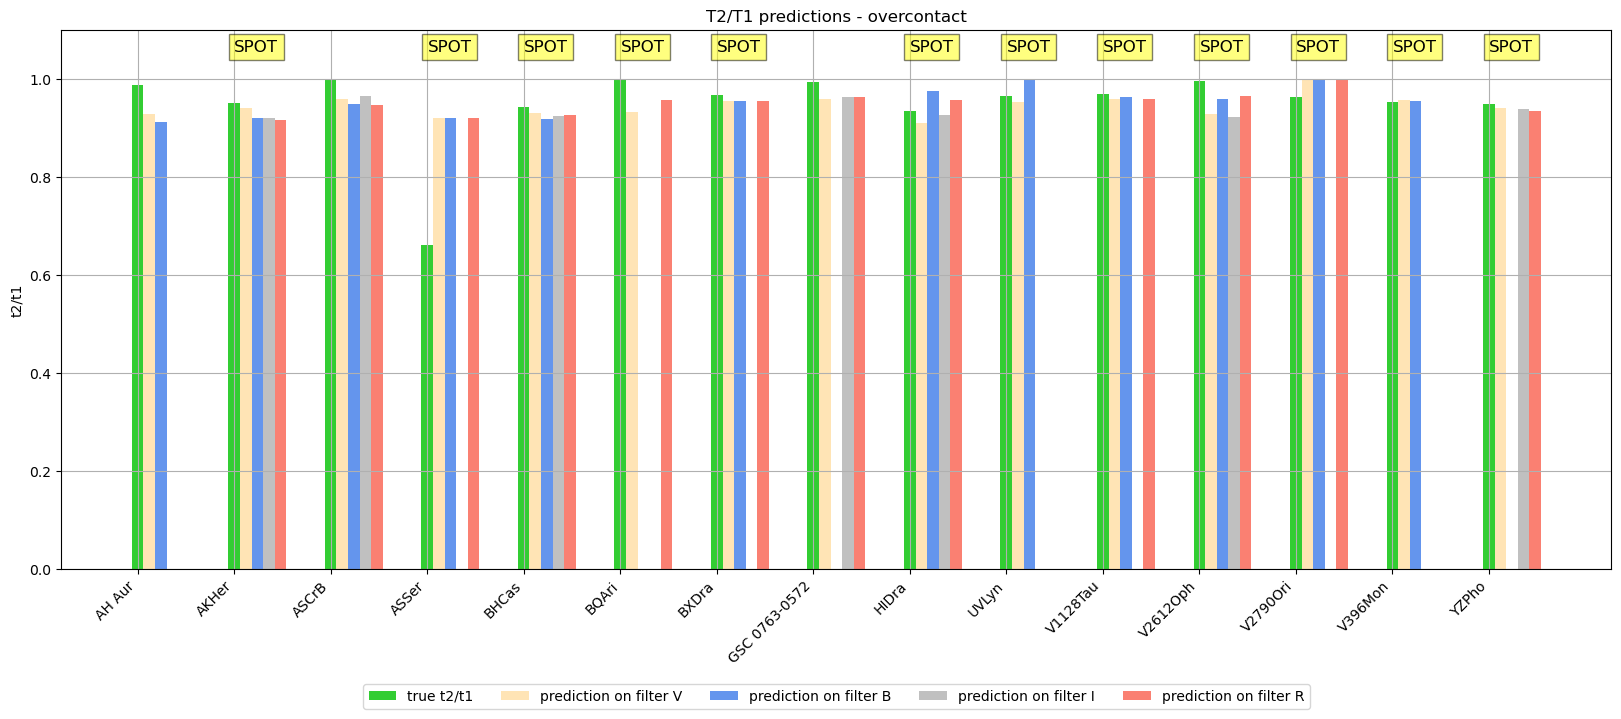

In [8]:
#BLOK 6
# Graficke porovnanie predikovanych a skutocnych hodnot parametra T2/T1 pre jednotlive filtre

true_t2_t1=data_obs[["T2/T1", "Name"]].groupby(["Name"]).mean()
names=pd.DataFrame(data={"Name":true_t2_t1.index})                #názvy systémov hviezd

t2_t1_B=pd.merge(names, data_obs[data_obs["Filter"]=="B"][["pred_t2_t1", "Name"]], how="left")
t2_t1_V=pd.merge(names, data_obs[data_obs["Filter"]=="V"][["pred_t2_t1", "Name"]], how="left")
t2_t1_R=pd.merge(names, data_obs[data_obs["Filter"]=="R"][["pred_t2_t1", "Name"]], how="left")
t2_t1_I=pd.merge(names, data_obs[data_obs["Filter"]=="I"][["pred_t2_t1", "Name"]], how="left")
fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_t2_t1["T2/T1"], barWidth, label='true t2/t1', color="limegreen")
ax.bar(br2, t2_t1_V["pred_t2_t1"], barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, t2_t1_B["pred_t2_t1"], barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, t2_t1_I["pred_t2_t1"], barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, t2_t1_R["pred_t2_t1"], barWidth, label='prediction on filter R', color="salmon")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.title("T2/T1 predictions - overcontact")
plt.xticks(br1, true_t2_t1.index, rotation=45, ha='right')
plt.ylabel("t2/t1")

plt.grid(visible="on")
plt.ylim(top=1.1)
autolabel(r, 1.05)
plt.show()

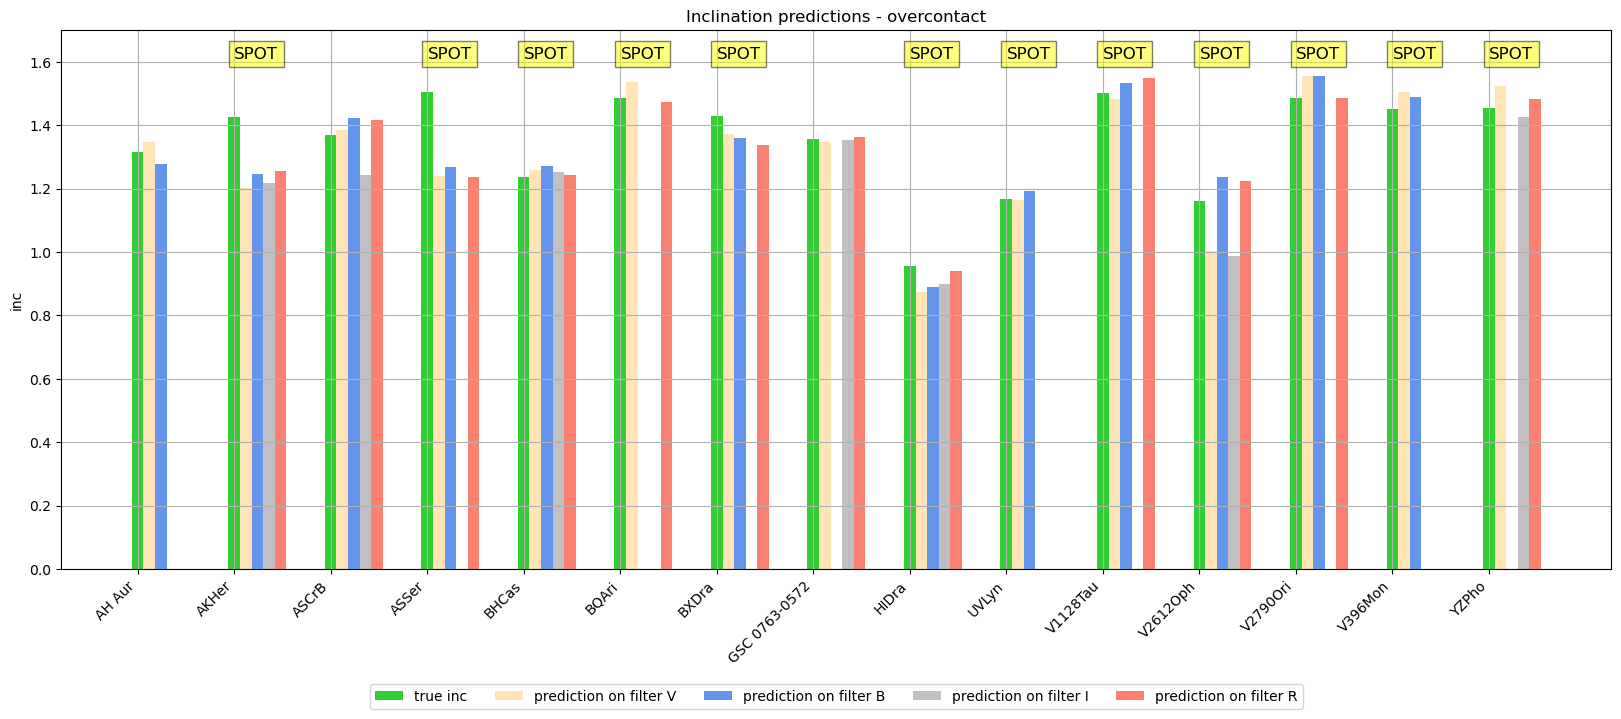

In [9]:
#BLOK 7
# Graficke porovnanie predikovanych a skutocnych hodnot parametra Inclination pre jednotlive filtre

true_inc=data_obs[["Inc", "Name"]].groupby(["Name"]).mean()
names=pd.DataFrame(data={"Name":true_inc.index})                #názvy systémov hviezd
inc_B=pd.merge(names, data_obs[data_obs["Filter"]=="B"][["pred_inc", "Name"]], how="left")
inc_V=pd.merge(names, data_obs[data_obs["Filter"]=="V"][["pred_inc", "Name"]], how="left")
inc_R=pd.merge(names, data_obs[data_obs["Filter"]=="R"][["pred_inc", "Name"]], how="left")
inc_I=pd.merge(names, data_obs[data_obs["Filter"]=="I"][["pred_inc", "Name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_inc["Inc"], barWidth, label='true inc', color="limegreen")
ax.bar(br2, inc_V["pred_inc"], barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, inc_B["pred_inc"], barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, inc_I["pred_inc"], barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, inc_R["pred_inc"], barWidth, label='prediction on filter R', color="salmon")

plt.title("Inclination predictions - overcontact")
plt.xticks(br1, true_inc.index, rotation=45, ha='right')
plt.ylabel("inc")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(visible="on")
plt.ylim(top=1.7)
autolabel(r, 1.60)
plt.show()

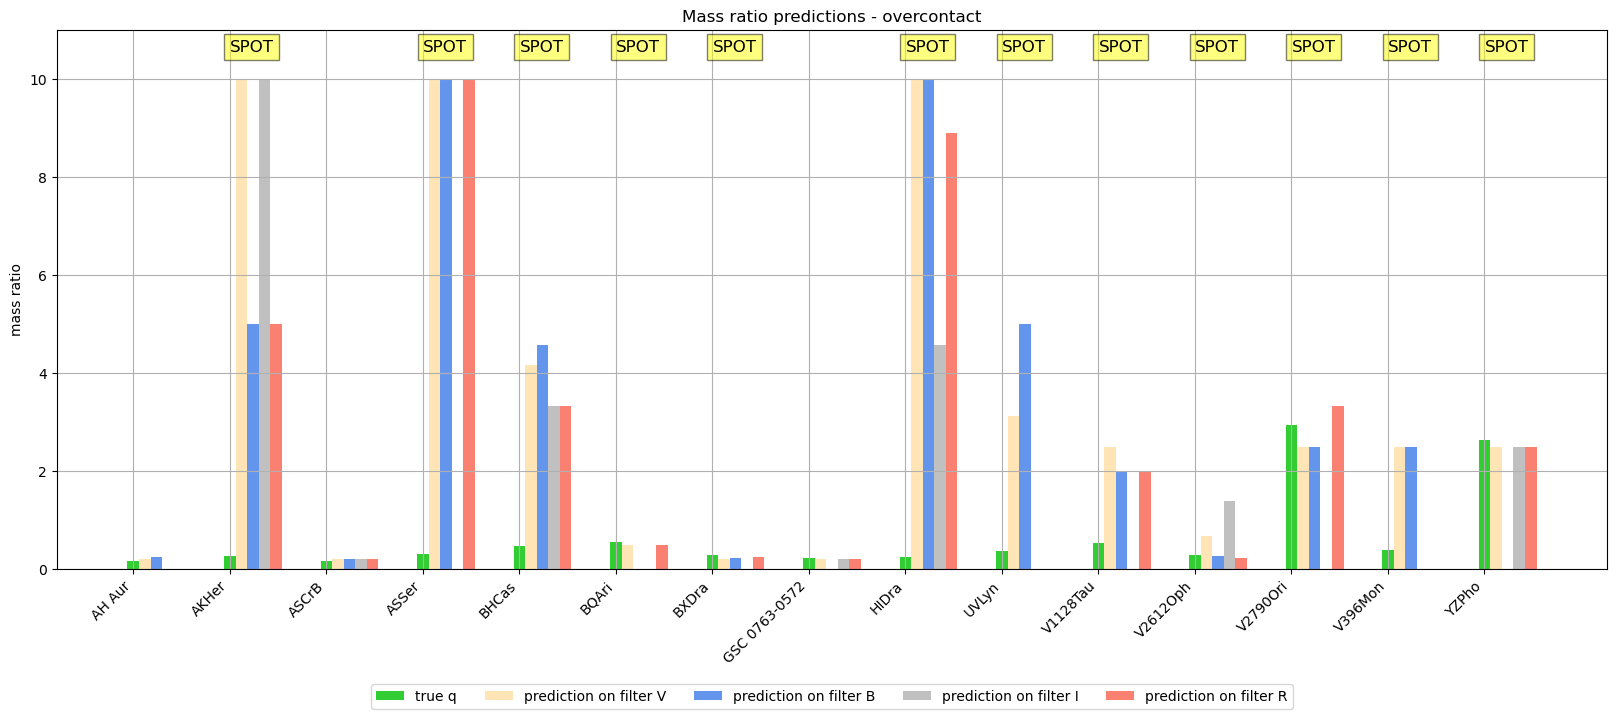

In [10]:
#BLOK 8
# Graficke porovnanie predikovanych a skutocnych hodnot parametra mass_ratio pre jednotlive filtre

true_q=data_obs[["Q", "Name"]].groupby(["Name"]).mean()
names=pd.DataFrame(data={"Name":true_q.index})                #názvy systémov hviezd
q_B=pd.merge(names, data_obs[data_obs["Filter"]=="B"][["pred_q", "Name"]], how="left")
q_V=pd.merge(names, data_obs[data_obs["Filter"]=="V"][["pred_q", "Name"]], how="left")
q_R=pd.merge(names, data_obs[data_obs["Filter"]=="R"][["pred_q", "Name"]], how="left")
q_I=pd.merge(names, data_obs[data_obs["Filter"]=="I"][["pred_q", "Name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_q["Q"], barWidth, label='true q', color="limegreen")
ax.bar(br2, q_V["pred_q"], barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, q_B["pred_q"], barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, q_I["pred_q"], barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, q_R["pred_q"], barWidth, label='prediction on filter R', color="salmon")

plt.title("Mass ratio predictions - overcontact")
plt.xticks(br1, true_q.index, rotation=45, ha='right')
plt.ylabel("mass ratio")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(visible="on")
plt.ylim(top=11.0)
autolabel(r, 10.5)
plt.show()

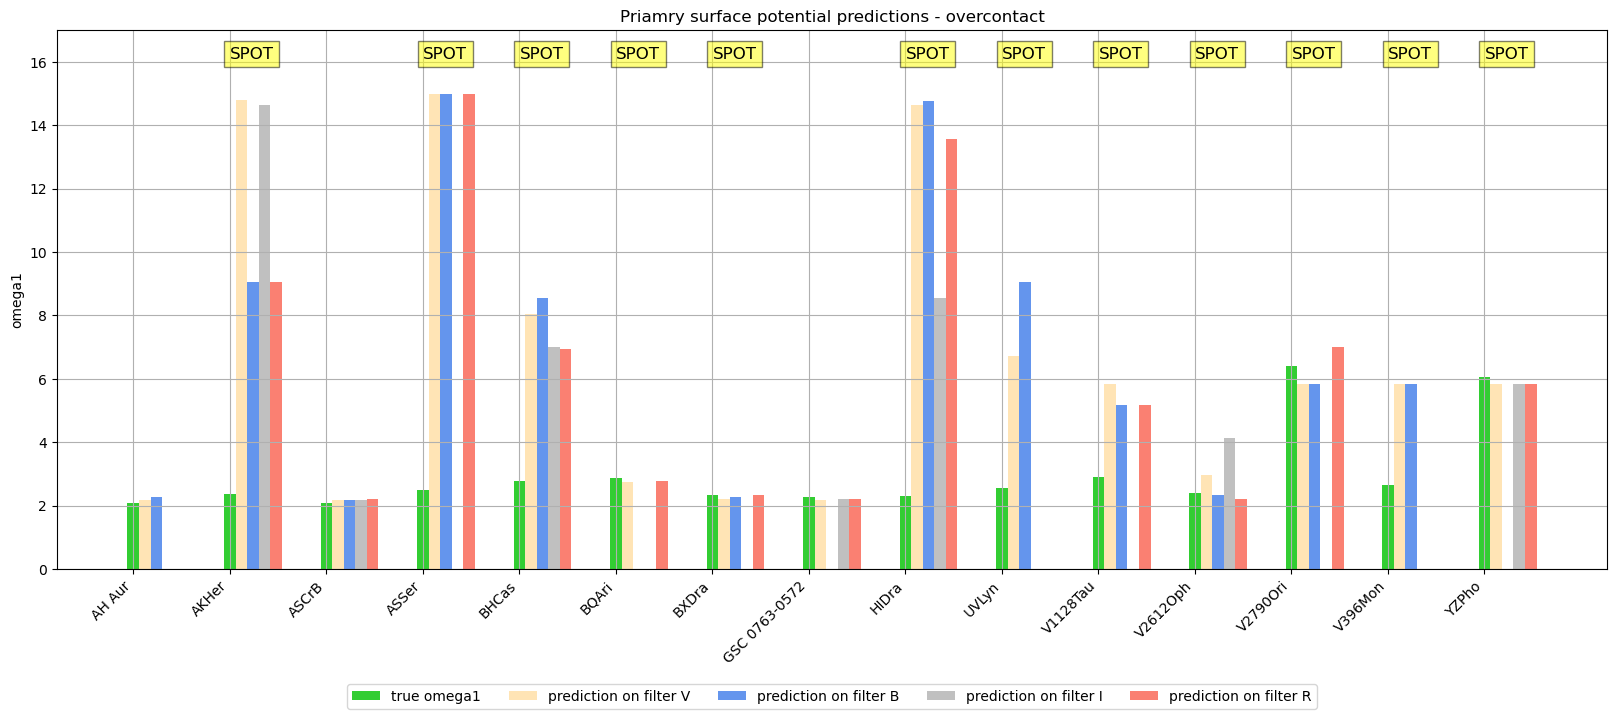

In [11]:
#BLOK 9
# Graficke porovnanie predikovanych a skutocnych hodnot parametra Primary_surface_potential pre jednotlive filtre

true_omega1=data_obs[["Omega1", "Name"]].groupby(["Name"]).mean()
names=pd.DataFrame(data={"Name":true_omega1.index})                #názvy systémov hviezd
omega1_B=pd.merge(names, data_obs[data_obs["Filter"]=="B"][["pred_omega1", "Name"]], how="left")
omega1_V=pd.merge(names, data_obs[data_obs["Filter"]=="V"][["pred_omega1", "Name"]], how="left")
omega1_R=pd.merge(names, data_obs[data_obs["Filter"]=="R"][["pred_omega1", "Name"]], how="left")
omega1_I=pd.merge(names, data_obs[data_obs["Filter"]=="I"][["pred_omega1", "Name"]], how="left")

fig, ax = plt.subplots(figsize=(20,7))

barWidth = 0.12
br1 = np.arange(len(names))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

r=ax.bar(br1, true_omega1["Omega1"], barWidth, label='true omega1', color="limegreen")
ax.bar(br2, omega1_V["pred_omega1"], barWidth, label='prediction on filter V', color="moccasin")
ax.bar(br3, omega1_B["pred_omega1"], barWidth, label='prediction on filter B', color="cornflowerblue")
ax.bar(br4, omega1_I["pred_omega1"], barWidth, label='prediction on filter I', color="silver")
ax.bar(br5, omega1_R["pred_omega1"], barWidth, label='prediction on filter R', color="salmon")

plt.title("Priamry surface potential predictions - overcontact")
plt.xticks(br1, true_omega1.index, rotation=45, ha='right')
plt.ylabel("omega1")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)

plt.grid(visible="on")
plt.ylim(top=17.0)
autolabel(r, 16.0)
plt.show()

In [12]:
#BLOK 10
# Chybovost pri predikcii pre kazdy parameter zvlast na observacnych krivkach

mse_t = mean_squared_error(data_obs["T2/T1"], data_obs['pred_t2_t1'])
mape_t = mean_absolute_percentage_error(data_obs["T2/T1"], data_obs['pred_t2_t1'])
mae_t = mean_absolute_error(data_obs["T2/T1"], data_obs['pred_t2_t1'])

mse_inc = mean_squared_error(data_obs["Inc"], data_obs['pred_inc'])
mape_inc = mean_absolute_percentage_error(data_obs["Inc"], data_obs['pred_inc'])
mae_inc = mean_absolute_error(data_obs["Inc"], data_obs['pred_inc'])

mse_mass = mean_squared_error(data_obs["Q"], data_obs['pred_q'])
mape_mass = mean_absolute_percentage_error(data_obs["Q"], data_obs['pred_q'])
mae_mass = mean_absolute_error(data_obs["Q"], data_obs['pred_q'])

mse_psp = mean_squared_error(data_obs["Omega1"], data_obs['pred_omega1'])
mape_psp = mean_absolute_percentage_error(data_obs["Omega1"], data_obs['pred_omega1'])
mae_psp = mean_absolute_error(data_obs["Omega1"], data_obs['pred_omega1'])

print("MSE T2/T1: " + str(mse_t) + " MAE T2/T1: " + str(mae_t) + " MAPE T2/T1: " + str(mape_t * 100) + "%")
print("MSE INC: " + str(mse_inc) + " MAE INC: " + str(mae_inc) + " MAPE INC: " + str(mape_inc * 100) + "%")
print("MSE MASS: " + str(mse_mass) + " MAE MASS: " + str(mae_mass) + " MAPE MASS: " + str(mape_mass * 100) + "%")
print("MSE PSP: " + str(mse_psp) + " MAE PSP: " + str(mae_psp) + " MAPE PSP: " + str(mape_psp * 100) + "%")

MSE T2/T1: 0.005487829448840723 MAE T2/T1: 0.044080744430188896 MAPE T2/T1: 5.332705789245336%
MSE INC: 0.010897438544876679 MAE INC: 0.07404797588993184 MAPE INC: 5.483448593464423%
MSE MASS: 19.442696021083986 MAE MASS: 2.7030850293484794 MAPE MASS: 886.2996100271035%
MSE PSP: 33.38537049926346 MAE PSP: 3.652632941940807 MAPE PSP: 146.90155204071877%
